# KNN on Fruits dataset

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_table('datasets/fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
df.shape

(59, 7)

In [4]:
lookup=dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
x=df[['mass','width','height','color_score']]
y=df['fruit_label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

<IPython.core.display.Javascript object>


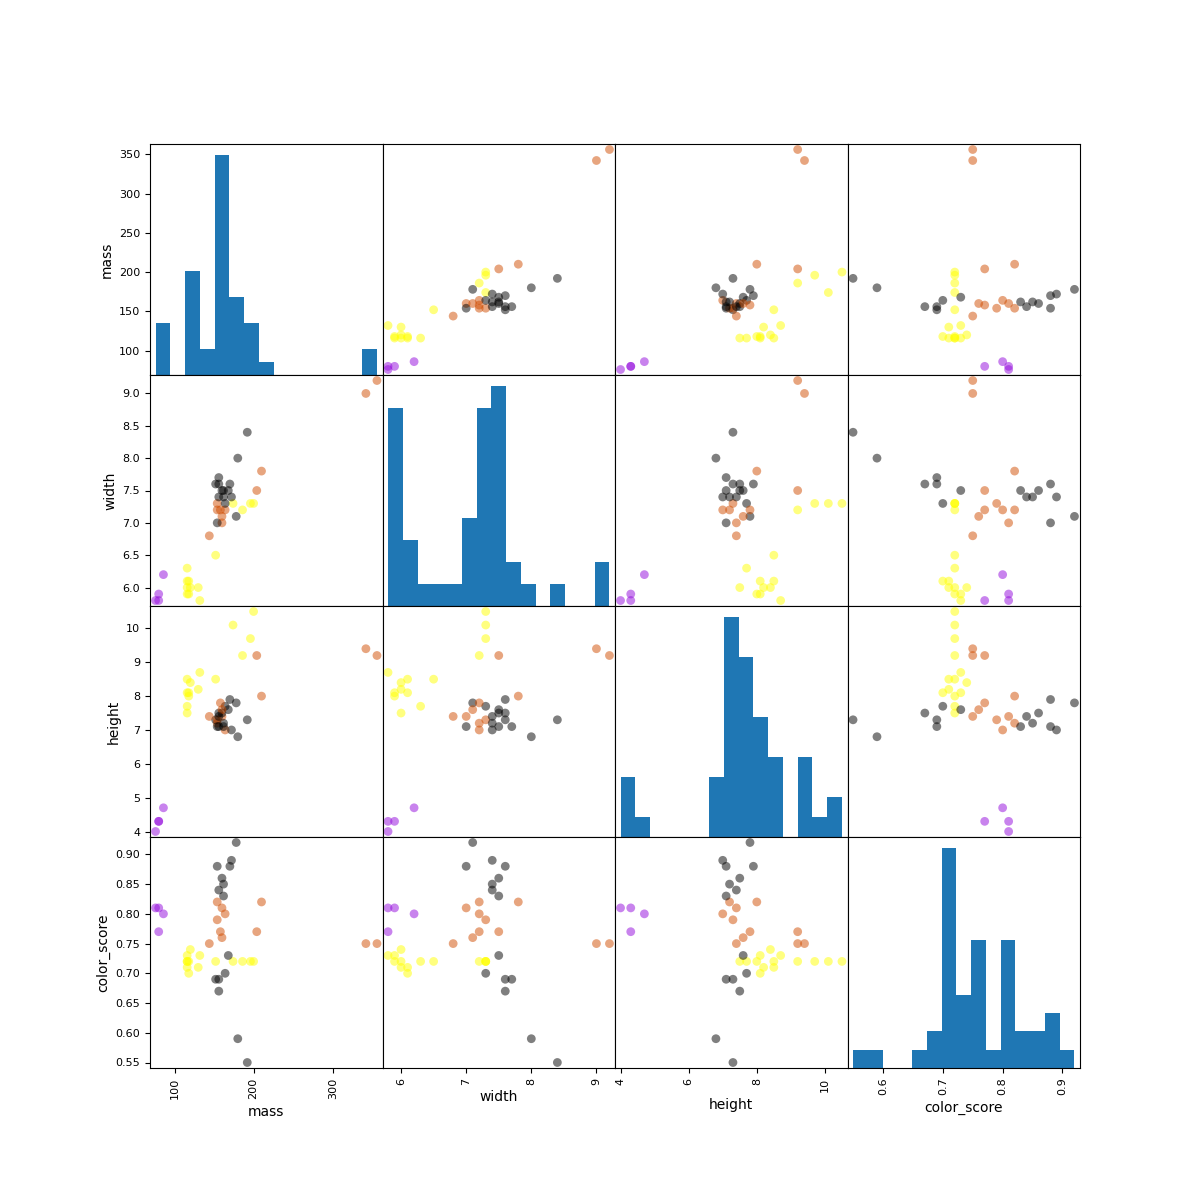

In [6]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(x_train, c=y_train, marker='o',s =40,hist_kwds={'bins':15}, figsize=(12,12),cmap=cmap)


<IPython.core.display.Javascript object>


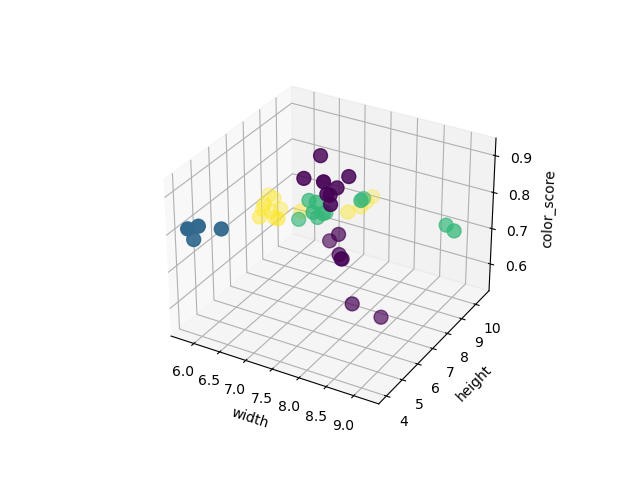

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()


In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knn=KNC(n_neighbors=5)

In [9]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
knn.score(x_train,y_train)

0.7954545454545454

In [21]:
predict=knn.predict([[20, 4.3, 5.5,0.88]])
predicted_class=lookup[predict[0]]
predicted_class

'mandarin'

# Accuracy with the change of value of K

<IPython.core.display.Javascript object>


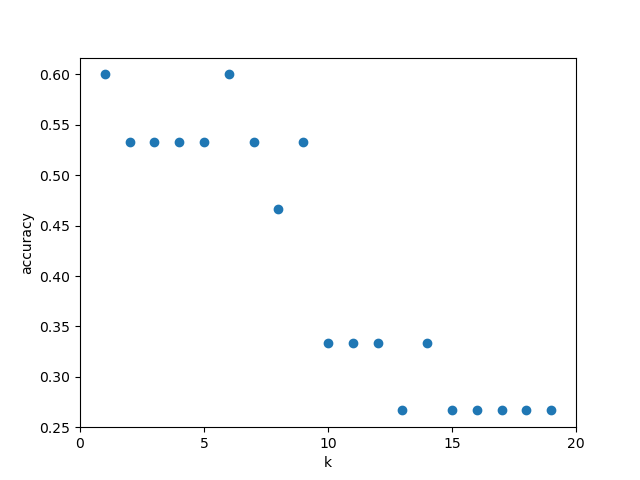

In [27]:
krange=range(1,20)
scrs=[]
for k in krange:
    knn=KNC(n_neighbors=k)
    knn.fit(x_train,y_train)
    scrs.append(knn.score(x_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(krange,scrs)
plt.xticks([0,5,10,15,20]);